In [42]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [43]:
#importing packages
%matplotlib inline
import scipy.stats as stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#import pandas.util.testing as tm
plt.style.use('ggplot')

In [44]:
#df = pd.read_csv('https://drive.google.com/file/d/1DLDWJVI4PEebYWVuJjwD6AlWrRUd8NZm/view?usp=sharing', sep='delimiter', header=None, engine='python')


#url = "https://drive.google.com/file/d/1DLDWJVI4PEebYWVuJjwD6AlWrRUd8NZm/view?usp=sharing"

df = pd.read_csv('/content/drive/My Drive/creditcard.csv')



In [45]:
print('This data frame has {} rows and {} columns.'.format(df.shape[0], df.shape[1]))
df.head()


This data frame has 284807 rows and 31 columns.


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.360,-0.073,2.536,1.378,-0.338,0.462,0.240,0.099,0.364,0.091,-0.552,-0.618,-0.991,-0.311,1.468,-0.470,0.208,0.026,0.404,0.251,-0.018,0.278,-0.110,0.067,0.129,-0.189,0.134,-0.021,149.62,0
1,0.0,1.192,0.266,0.166,0.448,0.060,-0.082,-0.079,0.085,-0.255,-0.167,1.613,1.065,0.489,-0.144,0.636,0.464,-0.115,-0.183,-0.146,-0.069,-0.226,-0.639,0.101,-0.340,0.167,0.126,-0.009,0.015,2.69,0
2,1.0,-1.358,-1.340,1.773,0.380,-0.503,1.800,0.791,0.248,-1.515,0.208,0.625,0.066,0.717,-0.166,2.346,-2.890,1.110,-0.121,-2.262,0.525,0.248,0.772,0.909,-0.689,-0.328,-0.139,-0.055,-0.060,378.66,0
3,1.0,-0.966,-0.185,1.793,-0.863,-0.010,1.247,0.238,0.377,-1.387,-0.055,-0.226,0.178,0.508,-0.288,-0.631,-1.060,-0.684,1.966,-1.233,-0.208,-0.108,0.005,-0.190,-1.176,0.647,-0.222,0.063,0.061,123.50,0
4,2.0,-1.158,0.878,1.549,0.403,-0.407,0.096,0.593,-0.271,0.818,0.753,-0.823,0.538,1.346,-1.120,0.175,-0.451,-0.237,-0.038,0.803,0.409,-0.009,0.798,-0.137,0.141,-0.206,0.502,0.219,0.215,69.99,0


In [46]:

#peek at data
df.sample(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
89858,62755.0,-1.746,0.694,1.452,1.407,-0.648,1.009,-0.763,1.218,0.008,-0.877,-1.939,-0.121,-0.580,0.244,0.318,-0.394,0.720,-0.031,1.120,-0.238,-0.071,-0.261,-0.337,-0.764,0.233,-0.185,-0.119,-0.198,70.00,0
216928,140693.0,1.908,-0.159,-0.402,1.046,-0.243,0.079,-0.535,0.217,0.552,0.411,0.868,0.480,-0.857,0.552,0.494,0.798,-1.010,0.514,-0.400,-0.260,-0.091,-0.349,0.425,0.594,-0.481,-1.014,0.036,-0.028,12.50,0
105013,69328.0,1.252,0.491,-0.809,0.472,0.718,-0.139,0.209,0.012,-0.391,-0.476,1.321,0.513,0.157,-0.873,0.530,0.595,0.532,0.434,-0.082,-0.060,-0.111,-0.254,-0.166,-0.891,0.584,0.432,-0.021,0.015,0.76,0
277131,167482.0,2.054,-0.109,-1.242,0.188,0.151,-0.616,0.074,-0.160,0.308,0.242,0.540,0.994,0.108,0.434,-0.631,0.228,-0.715,-0.225,0.615,-0.196,-0.269,-0.670,0.269,-0.491,-0.263,0.208,-0.075,-0.075,1.29,0
42365,41073.0,0.674,-1.894,0.837,-0.261,-1.702,0.553,-0.925,0.281,-0.102,0.378,1.046,0.331,-0.410,-0.541,-1.046,0.702,0.751,-1.385,0.753,0.614,0.259,0.219,-0.237,0.052,0.156,-0.262,0.007,0.063,310.60,0


In [47]:
#info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [48]:

#numerical summary -> only non-anonymized columns of interest
pd.set_option('precision', 3)
df.loc[:, ['Time', 'Amount']].describe()


,Time,Amount
count,284807.000,284807.000
mean,94813.860,88.350
std,47488.146,250.120
min,0.000,0.000
25%,54201.500,5.600
50%,84692.000,22.000
75%,139320.500,77.165
max,172792.000,25691.160


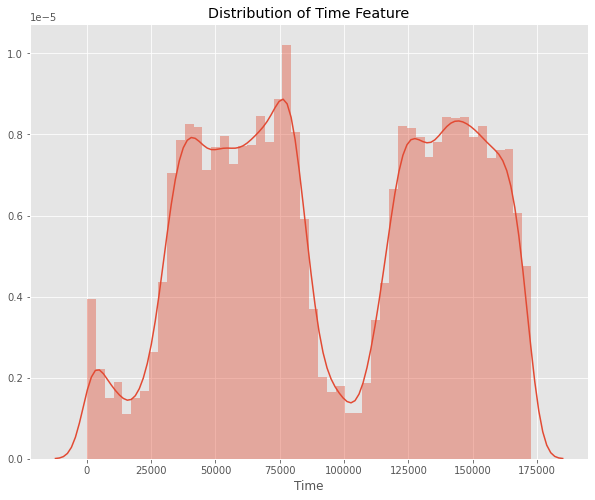

In [49]:
#visualizations of time and amount
plt.figure(figsize=(10,8))
plt.title('Distribution of Time Feature')
sns.distplot(df.Time)


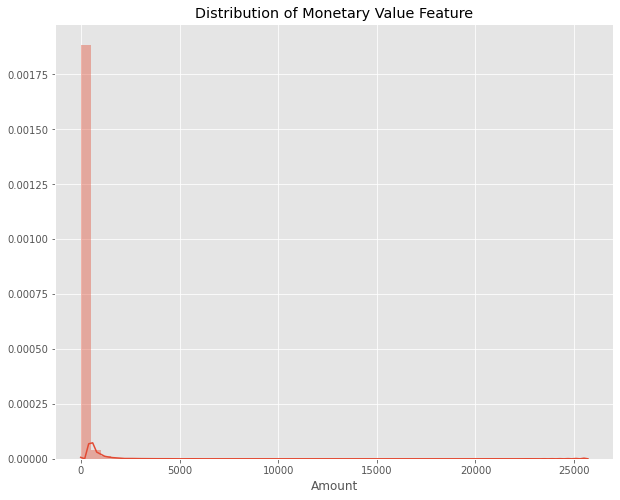

In [50]:

plt.figure(figsize=(10,8))
plt.title('Distribution of Monetary Value Feature')
sns.distplot(df.Amount)

In [51]:
#fraud vs. normal transactions 
counts = df.Class.value_counts()
normal = counts[0]
fraudulent = counts[1]
perc_normal = (normal/(normal+fraudulent))*100
perc_fraudulent = (fraudulent/(normal+fraudulent))*100
print('There were {} non-fraudulent transactions ({:.3f}%) and {} fraudulent transactions ({:.3f}%).'.format(normal, perc_normal, fraudulent, perc_fraudulent))

There were 284315 non-fraudulent transactions (99.827%) and 492 fraudulent transactions (0.173%).


Text(0.5, 0, 'Class (0:Non-Fraudulent, 1:Fraudulent)')

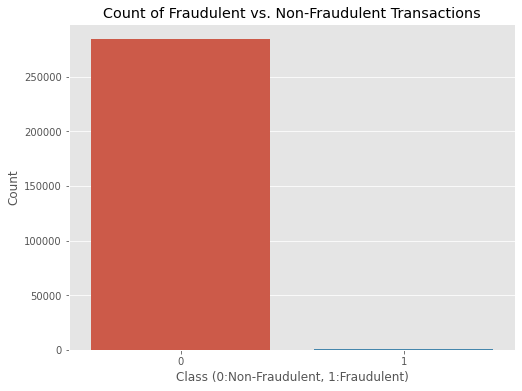

In [52]:
plt.figure(figsize=(8,6))
sns.barplot(x=counts.index, y=counts)
plt.title('Count of Fraudulent vs. Non-Fraudulent Transactions')
plt.ylabel('Count')
plt.xlabel('Class (0:Non-Fraudulent, 1:Fraudulent)')

In [53]:
corr = df.corr()
corr


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000,1.174e-01,-1.059e-02,-4.196e-01,-1.053e-01,1.731e-01,-6.302e-02,8.471e-02,-3.695e-02,-8.660e-03,3.062e-02,-2.477e-01,1.243e-01,-6.590e-02,-9.876e-02,-1.835e-01,1.190e-02,-7.330e-02,9.044e-02,2.898e-02,-5.087e-02,4.474e-02,1.441e-01,5.114e-02,-1.618e-02,-2.331e-01,-4.141e-02,-5.135e-03,-9.413e-03,-1.060e-02,-1.232e-02
V1,0.117,1.000e+00,4.697e-17,-1.424e-15,1.755e-17,6.391e-17,2.398e-16,1.992e-15,-9.491e-17,2.170e-16,7.434e-17,2.439e-16,2.422e-16,-2.115e-16,9.353e-16,-3.252e-16,6.309e-16,-5.012e-16,2.870e-16,1.818e-16,1.037e-16,-1.755e-16,7.477e-17,9.809e-16,7.354e-17,-9.805e-16,-8.622e-17,3.208e-17,9.821e-16,-2.277e-01,-1.013e-01
V2,-0.011,4.697e-17,1.000e+00,2.512e-16,-1.126e-16,-2.040e-16,5.025e-16,3.966e-16,-4.414e-17,-5.729e-17,-4.782e-16,9.469e-16,-6.588e-16,3.855e-16,-2.541e-16,2.831e-16,4.934e-17,-9.883e-16,2.637e-16,9.528e-17,-9.310e-16,8.444e-17,2.501e-16,1.060e-16,-8.142e-18,-4.262e-17,2.602e-16,-4.478e-16,-3.676e-16,-5.314e-01,9.129e-02
V3,-0.420,-1.424e-15,2.512e-16,1.000e+00,-3.417e-16,-1.437e-15,1.432e-15,2.169e-15,3.433e-16,-4.234e-16,6.289e-16,-5.502e-17,2.207e-16,-6.883e-16,4.271e-16,1.123e-16,1.183e-15,4.577e-17,5.428e-16,2.577e-16,-9.429e-16,-2.972e-17,4.648e-16,2.115e-17,-9.352e-17,4.771e-16,6.522e-16,6.240e-16,7.727e-16,-2.109e-01,-1.930e-01
V4,-0.105,1.755e-17,-1.126e-16,-3.417e-16,1.000e+00,-1.941e-15,-2.713e-16,1.556e-16,5.196e-16,3.860e-16,6.055e-16,-2.084e-16,-5.658e-16,-1.506e-16,-8.522e-17,-1.508e-16,-6.939e-16,-4.398e-16,1.494e-16,-2.657e-16,-3.223e-16,-9.977e-17,2.100e-16,6.003e-17,2.230e-16,5.395e-16,-6.180e-16,-6.403e-17,-5.864e-17,9.873e-02,1.334e-01
V5,0.173,6.391e-17,-2.040e-16,-1.437e-15,-1.941e-15,1.000e+00,7.926e-16,-4.210e-16,7.589e-16,4.205e-16,-6.602e-16,7.343e-16,3.761e-16,-9.579e-16,-3.635e-16,-5.133e-16,-3.517e-16,1.426e-16,1.110e-15,-3.138e-16,2.076e-16,-1.369e-16,5.060e-16,1.638e-16,-9.286e-16,5.625e-16,9.145e-16,4.466e-16,-3.299e-16,-3.864e-01,-9.497e-02
V6,-0.063,2.398e-16,5.025e-16,1.432e-15,-2.713e-16,7.926e-16,1.000e+00,1.429e-16,-1.707e-16,1.114e-16,2.851e-16,4.866e-16,2.141e-16,-2.268e-16,3.453e-16,-6.368e-18,-2.478e-16,3.568e-16,2.811e-16,2.717e-16,1.899e-16,-1.576e-16,-3.363e-16,-7.232e-17,-1.262e-15,1.082e-15,-2.378e-16,-2.624e-16,4.813e-16,2.160e-01,-4.364e-02
V7,0.085,1.992e-15,3.966e-16,2.169e-15,1.556e-16,-4.210e-16,1.429e-16,1.000e+00,-8.692e-17,7.933e-16,3.043e-17,-1.084e-15,1.510e-15,-9.892e-17,-1.729e-16,1.937e-17,2.894e-16,1.150e-15,-1.117e-16,-2.874e-16,1.744e-16,1.939e-16,-1.058e-15,2.328e-16,-2.590e-17,1.174e-15,-7.335e-16,-5.887e-16,-6.837e-17,3.973e-01,-1.873e-01
V8,-0.037,-9.491e-17,-4.414e-17,3.433e-16,5.196e-16,7.589e-16,-1.707e-16,-8.692e-17,1.000e+00,2.901e-16,9.052e-17,1.955e-16,-6.266e-17,-2.383e-16,-1.131e-16,2.021e-16,5.027e-16,-3.509e-16,-4.094e-16,-5.340e-16,-1.096e-16,-2.412e-16,5.476e-16,3.897e-16,-1.803e-16,-1.391e-16,-1.210e-16,1.734e-16,-4.484e-16,-1.031e-01,1.988e-02
V9,-0.009,2.170e-16,-5.729e-17,-4.234e-16,3.860e-16,4.205e-16,1.114e-16,7.933e-16,2.901e-16,1.000e+00,-2.772e-16,4.682e-16,-2.445e-15,-2.650e-16,2.343e-16,-1.588e-15,-3.252e-16,6.536e-16,1.204e-16,1.121e-16,-4.341e-16,4.578e-17,2.872e-17,5.929e-16,-2.346e-16,1.100e-15,-1.389e-15,-2.287e-16,9.147e-16,-4.425e-02,-9.773e-02


Text(0.5, 1.0, 'Heatmap of Correlation')

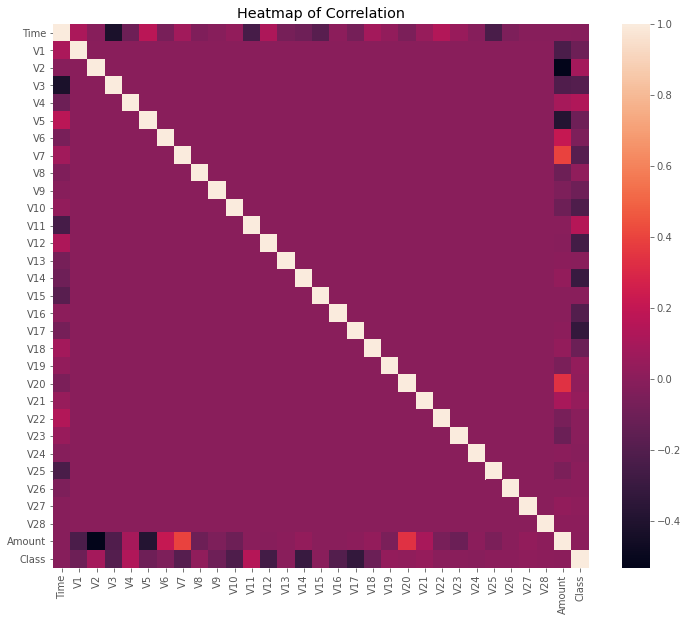

In [54]:
#heatmap
corr = df.corr()
plt.figure(figsize=(12,10))
heat = sns.heatmap(data=corr)
plt.title('Heatmap of Correlation')

In [55]:
#skewness
skew_ = df.skew()
skew_

Time      -0.036
V1        -3.281
V2        -4.625
V3        -2.240
V4         0.676
V5        -2.426
V6         1.827
V7         2.554
V8        -8.522
V9         0.555
V10        1.187
V11        0.357
V12       -2.278
V13        0.065
V14       -1.995
V15       -0.308
V16       -1.101
V17       -3.845
V18       -0.260
V19        0.109
V20       -2.037
V21        3.593
V22       -0.213
V23       -5.875
V24       -0.552
V25       -0.416
V26        0.577
V27       -1.170
V28       11.192
Amount    16.978
Class     23.998
dtype: float64

In [56]:

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler2 = StandardScaler()
#scaling time
scaled_time = scaler.fit_transform(df[['Time']])
flat_list1 = [item for sublist in scaled_time.tolist() for item in sublist]
scaled_time = pd.Series(flat_list1)

In [57]:

#scaling the amount column
scaled_amount = scaler2.fit_transform(df[['Amount']])
flat_list2 = [item for sublist in scaled_amount.tolist() for item in sublist]
scaled_amount = pd.Series(flat_list2)

In [58]:
#concatenating newly created columns w original df
df = pd.concat([df, scaled_amount.rename('scaled_amount'), scaled_time.rename('scaled_time')], axis=1)
df.sample(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class,scaled_amount,scaled_time
109992,71631.0,-1.212,-0.363,2.762,-0.681,-0.765,0.034,0.844,-0.039,0.488,-1.229,-0.129,0.686,0.304,-0.938,-0.685,-0.498,0.256,-1.188,-0.628,0.445,-0.041,-0.109,0.289,0.663,0.080,0.819,-0.231,-0.147,187.64,0,0.397,-0.488
102144,68068.0,-0.539,1.268,0.465,0.539,0.454,0.240,0.506,0.404,-1.191,-0.331,0.171,0.920,1.323,0.568,0.234,0.285,-0.760,0.898,1.142,0.063,0.204,0.489,-0.219,-0.807,-0.060,-0.282,0.041,0.084,35.40,0,-0.212,-0.563
223061,143232.0,0.066,-4.610,-1.497,-0.036,-2.012,1.038,-0.068,0.049,0.351,0.215,0.138,0.281,0.045,-0.501,-1.373,1.276,0.171,-0.775,0.978,2.131,0.618,-0.471,-0.634,0.272,-0.758,-0.499,-0.168,0.136,1067.46,0,3.915,1.020
209118,137421.0,-1.516,-1.394,0.622,0.227,3.731,3.335,-1.691,1.288,-0.444,-0.018,0.120,-0.058,0.129,0.304,2.392,-0.838,0.512,-0.070,2.703,0.900,-0.092,-0.821,0.286,0.721,-0.102,0.826,0.022,0.115,20.48,0,-0.271,0.897
227123,144944.0,1.933,0.004,-1.781,0.263,1.007,0.625,-0.064,0.209,0.476,-0.522,0.181,0.446,0.019,-0.755,1.017,-0.642,1.386,-1.776,-1.121,-0.258,-0.273,-0.566,0.439,-0.440,-0.498,0.266,-0.009,-0.041,1.98,0,-0.345,1.056


In [59]:
#dropping old amount and time columns
df.drop(['Amount', 'Time'], axis=1, inplace=True)

In [60]:
#manual train test split using numpy's random.rand
mask = np.random.rand(len(df)) < 0.9
train = df[mask]
test = df[~mask]
print('Train Shape: {}\nTest Shape: {}'.format(train.shape, test.shape))

Train Shape: (256377, 31)
Test Shape: (28430, 31)


In [61]:
train.reset_index(drop=True, inplace=True)
test.reset_index(drop=True, inplace=True)

In [62]:
#how many random samples from normal transactions do we need?
no_of_frauds = train.Class.value_counts()[1]
print('There are {} fraudulent transactions in the train data.'.format(no_of_frauds))

There are 452 fraudulent transactions in the train data.


In [63]:
#randomly selecting 442 random non-fraudulent transactions
non_fraud = train[train['Class'] == 0]
fraud = train[train['Class'] == 1]

In [64]:
selected = non_fraud.sample(no_of_frauds)
selected.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
12371,0.899,-0.294,1.404,1.912,-0.735,0.873,-0.631,0.314,2.242,-0.652,1.738,-0.718,1.352,0.898,-3.159,-1.035,1.328,-0.650,0.162,-0.110,-0.460,-0.782,0.050,0.164,0.324,-0.585,0.049,0.026,0,-0.049,-1.482
43936,-2.537,0.887,-1.736,0.989,-0.018,-0.616,0.119,1.027,-0.774,0.429,0.160,1.161,0.930,1.214,0.021,0.334,-0.338,0.654,1.061,-0.615,-0.041,0.658,0.907,-0.495,-0.194,-0.317,0.527,-0.098,0,0.007,-1.074
245965,-0.295,1.455,-0.886,-0.150,0.379,-1.320,0.732,0.092,-0.200,-0.920,-0.495,0.275,0.693,-0.689,0.629,0.047,0.615,0.551,-0.276,-0.072,0.330,1.083,-0.119,-0.062,-0.300,-0.148,0.143,0.122,0,-0.294,1.489
69766,-0.691,0.204,0.912,0.465,1.640,0.445,0.513,-0.122,-0.036,0.761,0.134,-0.783,-1.493,0.333,0.953,-0.134,-0.767,0.714,0.879,0.139,-0.021,0.359,-0.396,-1.333,-0.240,-0.282,0.006,-0.241,0,-0.276,-0.794
244767,1.738,-2.480,-0.244,-1.395,-2.137,0.180,-1.637,0.143,-0.758,1.536,0.277,-0.287,0.180,-0.608,-0.477,0.179,0.044,0.883,-0.064,0.050,0.032,0.067,0.096,-0.425,-0.652,-0.264,0.018,-0.003,0,0.662,1.474


In [65]:
#concatenating both into a subsample data set with equal class distribution
selected.reset_index(drop=True, inplace=True)
fraud.reset_index(drop=True, inplace=True)

In [66]:
subsample = pd.concat([selected, fraud])
len(subsample)

904

In [67]:
#shuffling our data set
subsample = subsample.sample(frac=1).reset_index(drop=True)
subsample.head(10)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
0,-1.054,4.363,-6.024,5.305,1.481,-2.194,-1.531,0.627,-4.037,-6.285,3.536,-7.960,-1.673,-12.458,-0.214,-1.424,-3.244,0.060,-1.802,0.532,0.398,-0.945,-0.376,-0.220,0.264,0.049,0.847,0.532,1,-0.353,1.121
1,-2.536,5.794,-7.618,6.396,-0.065,-3.136,-3.105,1.823,-3.879,-7.298,7.072,-10.001,-0.208,-10.861,-1.691,-2.361,-2.760,0.298,-1.386,0.409,0.717,-0.448,-0.402,-0.289,1.012,0.426,0.413,0.308,1,-0.349,-1.809
2,-20.533,12.374,-23.009,6.145,-15.587,-4.384,-15.939,13.696,-3.948,-8.790,5.612,-7.914,0.308,-8.329,-0.007,-6.825,-13.316,-4.922,1.188,1.593,1.755,-1.466,-0.857,0.126,1.403,-0.224,1.574,0.469,1,0.047,-1.432
3,1.241,0.367,0.308,0.695,-0.332,-1.058,0.134,-0.236,-0.049,-0.302,0.025,0.520,0.762,-0.392,1.036,0.454,-0.036,-0.363,-0.205,-0.030,-0.276,-0.790,0.116,0.360,0.231,0.092,-0.021,0.033,0,-0.313,-0.396
4,1.286,-0.021,0.604,-0.062,-0.793,-1.031,-0.211,-0.165,0.400,-0.211,-0.234,0.210,0.105,0.134,1.254,0.408,-0.363,-0.416,0.030,-0.070,-0.135,-0.374,0.098,0.429,0.117,0.905,-0.071,0.009,0,-0.350,-1.424
5,1.214,0.150,-0.542,0.069,0.769,0.350,0.340,-0.022,-0.520,0.022,0.675,1.165,1.213,0.427,0.302,0.283,-0.774,-0.511,0.532,0.071,-0.357,-1.101,-0.053,-1.324,0.384,0.227,-0.054,-0.009,0,-0.162,-0.951
6,-2.450,2.108,-5.141,1.411,-1.691,-0.736,-3.658,1.945,-0.788,-5.625,3.520,-7.222,1.202,-3.811,-1.701,-3.571,-7.311,-1.754,0.795,-0.130,0.801,0.365,0.234,-0.282,-0.320,0.493,0.360,-0.115,1,-0.033,0.331
7,-5.223,4.642,-8.858,7.724,-1.507,-2.159,-4.205,0.979,-1.506,-2.239,4.231,-8.493,-1.093,-13.238,1.184,-4.186,-5.493,-1.216,1.046,-0.177,0.562,0.624,0.536,-0.628,-0.223,0.382,-2.693,0.408,1,-0.349,1.211
8,0.953,-1.303,0.978,-0.600,-1.266,0.830,-1.168,0.352,-0.496,0.499,1.722,0.810,0.901,-0.580,0.098,0.771,0.586,-1.502,-0.026,0.359,0.510,1.296,-0.190,-0.207,0.252,-0.022,0.058,0.035,0,0.255,-0.321
9,1.218,0.625,-0.476,1.163,0.254,-0.742,0.163,-0.045,-0.241,-0.495,1.427,0.159,-0.657,-1.046,0.476,0.917,0.555,1.267,-0.206,-0.113,-0.045,-0.118,-0.170,-0.151,0.686,-0.322,0.027,0.043,0,-0.349,-0.877


Text(0.5, 0, 'Class (0:Non-Fraudulent, 1:Fraudulent)')

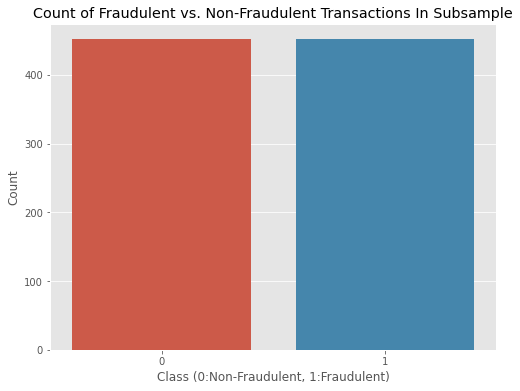

In [68]:
new_counts = subsample.Class.value_counts()
plt.figure(figsize=(8,6))
sns.barplot(x=new_counts.index, y=new_counts)
plt.title('Count of Fraudulent vs. Non-Fraudulent Transactions In Subsample')
plt.ylabel('Count')
plt.xlabel('Class (0:Non-Fraudulent, 1:Fraudulent)')

In [69]:

#taking a look at correlations once more
corr = subsample.corr()
corr = corr[['Class']]
corr

,Class
V1,-0.437
V2,0.492
V3,-0.572
V4,0.704
V5,-0.375
V6,-0.426
V7,-0.485
V8,0.041
V9,-0.567
V10,-0.629


In [70]:

#negative correlations smaller than -0.5
corr[corr.Class < -0.5]

,Class
V3,-0.572
V9,-0.567
V10,-0.629
V12,-0.685
V14,-0.750
V16,-0.600
V17,-0.563


In [71]:
#positive correlations greater than 0.5
corr[corr.Class > 0.5]

,Class
V4,0.704
V11,0.682
Class,1.000


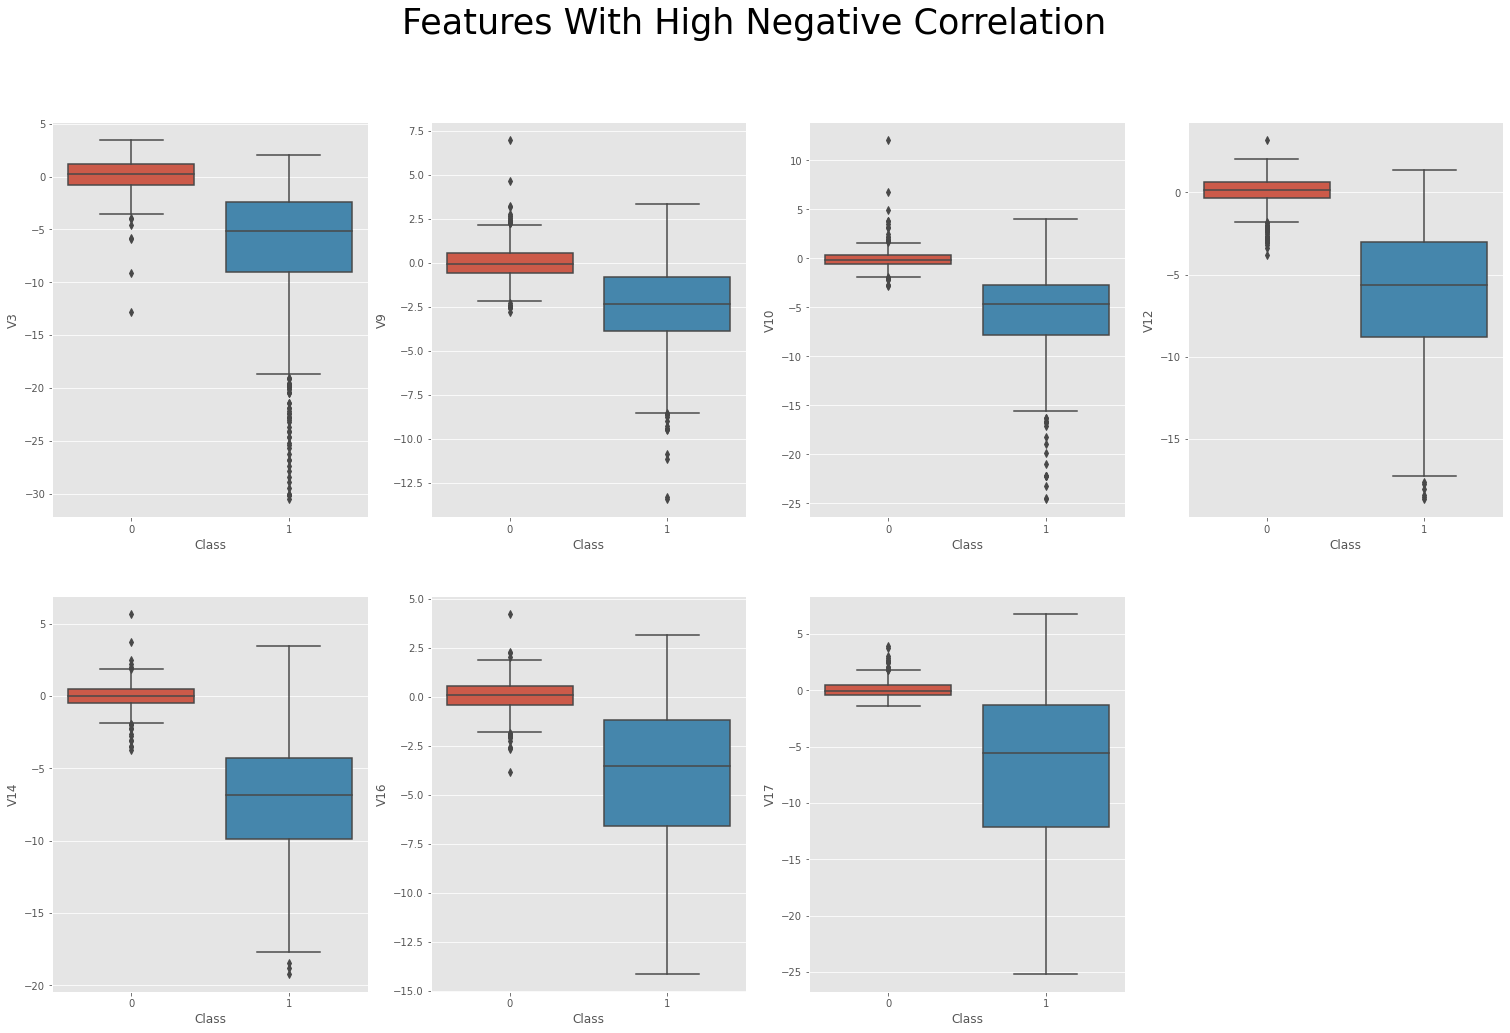

In [72]:
#visualizing the features w high negative correlation
f, axes = plt.subplots(nrows=2, ncols=4, figsize=(26,16))

f.suptitle('Features With High Negative Correlation', size=35)
sns.boxplot(x="Class", y="V3", data=subsample, ax=axes[0,0])
sns.boxplot(x="Class", y="V9", data=subsample, ax=axes[0,1])
sns.boxplot(x="Class", y="V10", data=subsample, ax=axes[0,2])
sns.boxplot(x="Class", y="V12", data=subsample, ax=axes[0,3])
sns.boxplot(x="Class", y="V14", data=subsample, ax=axes[1,0])
sns.boxplot(x="Class", y="V16", data=subsample, ax=axes[1,1])
sns.boxplot(x="Class", y="V17", data=subsample, ax=axes[1,2])
f.delaxes(axes[1,3])

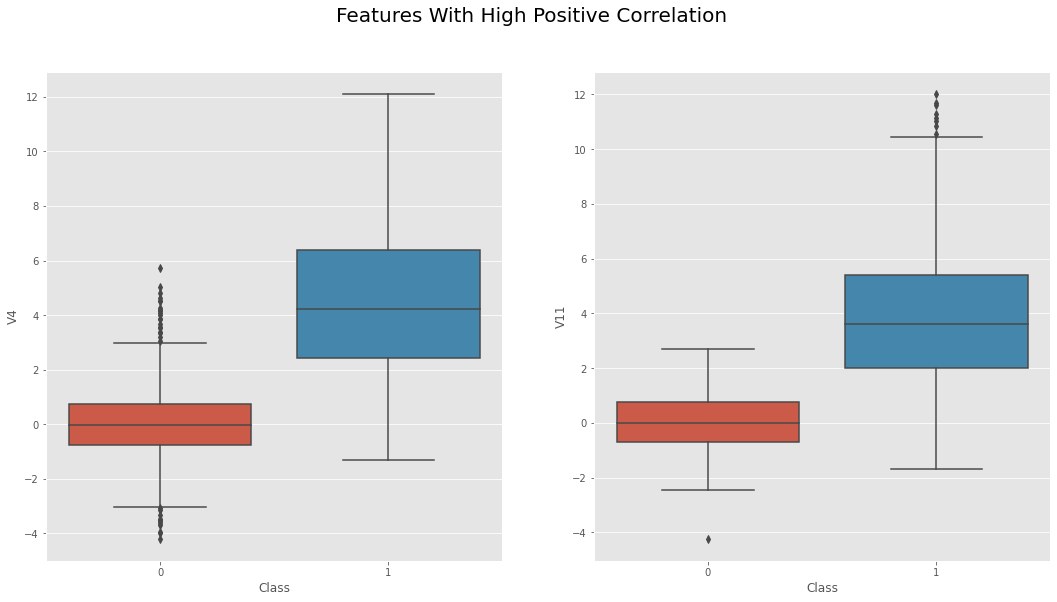

In [73]:
#visualizing the features w high positive correlation
f, axes = plt.subplots(nrows=1, ncols=2, figsize=(18,9))

f.suptitle('Features With High Positive Correlation', size=20)
sns.boxplot(x="Class", y="V4", data=subsample, ax=axes[0])
sns.boxplot(x="Class", y="V11", data=subsample, ax=axes[1])

In [74]:
#Only removing extreme outliers
Q1 = subsample.quantile(0.25)
Q3 = subsample.quantile(0.75)
IQR = Q3 - Q1

df2 = subsample[~((subsample < (Q1 - 2.5 * IQR)) |(subsample > (Q3 + 2.5 * IQR))).any(axis=1)]


In [75]:

len_after = len(df2)
len_before = len(subsample)
len_difference = len(subsample) - len(df2)
print('We reduced our data size from {} transactions by {} transactions to {} transactions.'.format(len_before, len_difference, len_after))

We reduced our data size from 904 transactions by 255 transactions to 649 transactions.


Dimensionality Reduction

In [76]:
from sklearn.manifold import TSNE

X = df2.drop('Class', axis=1)
y = df2['Class']

In [77]:
X_reduced_tsne = TSNE(n_components=2, random_state=42).fit_transform(X.values)

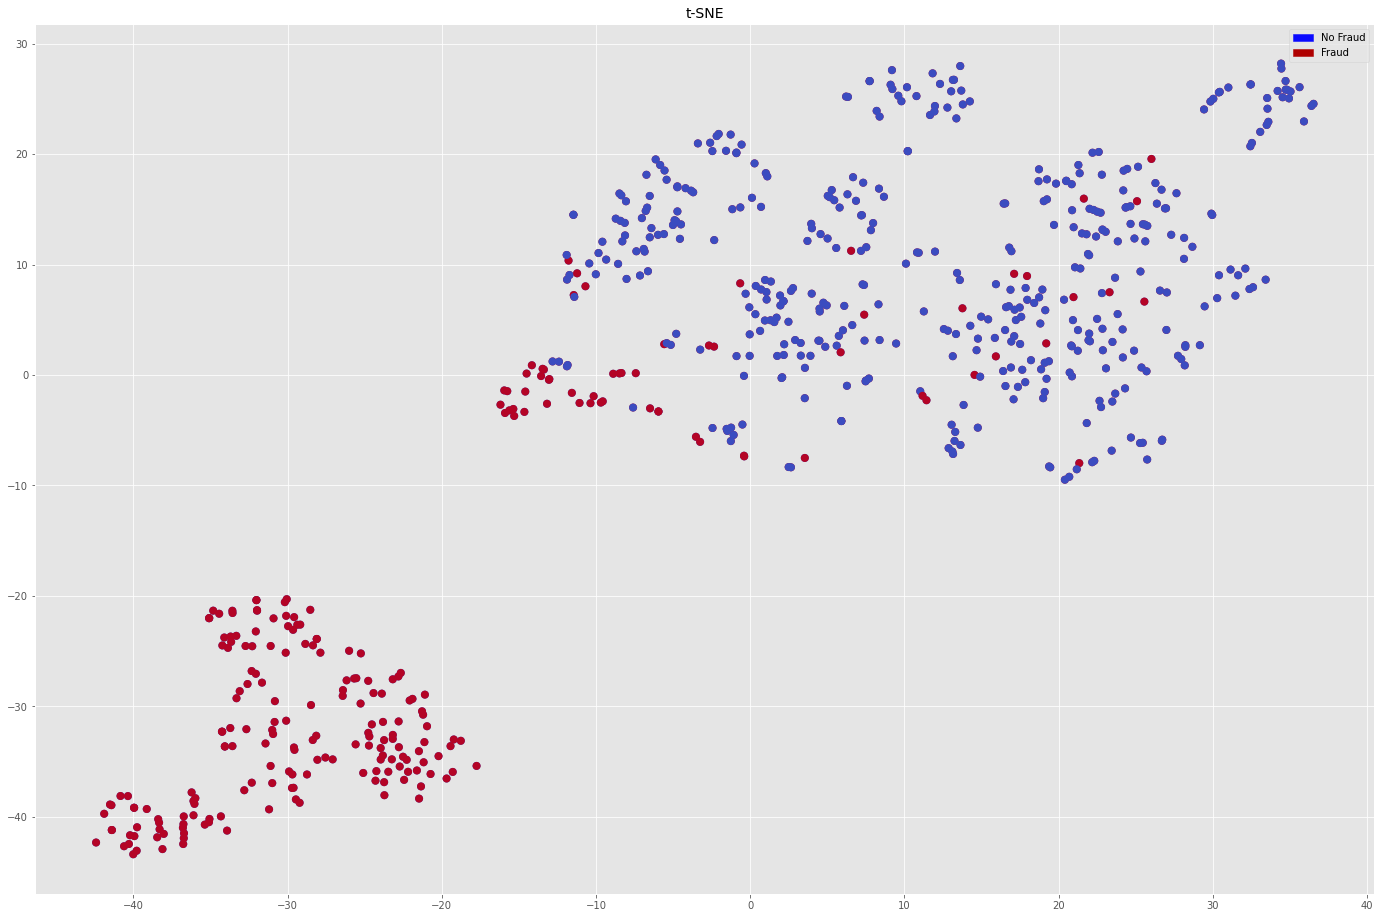

In [78]:
# t-SNE scatter plot
import matplotlib.patches as mpatches

f, ax = plt.subplots(figsize=(24,16))


blue_patch = mpatches.Patch(color='#0A0AFF', label='No Fraud')
red_patch = mpatches.Patch(color='#AF0000', label='Fraud')

ax.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax.set_title('t-SNE', fontsize=14)

ax.grid(True)

ax.legend(handles=[blue_patch, red_patch])

Classification Algorithms

In [79]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [80]:
# train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [81]:
X_train = X_train.values
X_validation = X_test.values
y_train = y_train.values
y_validation = y_test.values

In [82]:
print('X_shapes:\n', 'X_train:', 'X_validation:\n', X_train.shape, X_validation.shape, '\n')
print('Y_shapes:\n', 'Y_train:', 'Y_validation:\n', y_train.shape, y_validation.shape)

X_shapes:
 X_train: X_validation:
 (519, 30) (130, 30) 

Y_shapes:
 Y_train: Y_validation:
 (519,) (130,)


In [83]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

In [84]:
##Spot-Checking Algorithms

models = []

models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('SVM', SVC()))
models.append(('XGB', XGBClassifier()))
models.append(('RF', RandomForestClassifier()))

#testing models

results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=10, random_state=42)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='roc_auc')
    results.append(cv_results)
    names.append(name)
    msg = '%s: %f (%f)' % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.960405 (0.042839)
LDA: 0.960701 (0.041303)
KNN: 0.960414 (0.038500)
CART: 0.896456 (0.052892)
SVM: 0.967427 (0.037350)
XGB: 0.957533 (0.042467)
RF: 0.962066 (0.033127)


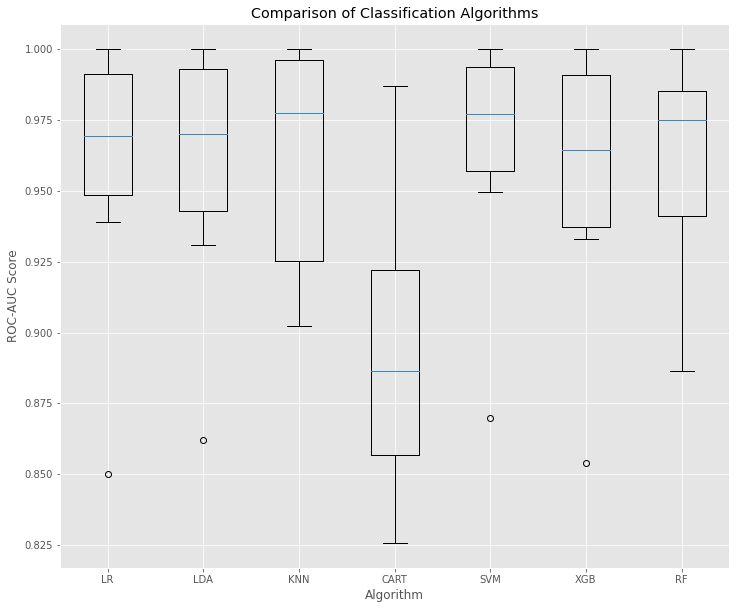

In [85]:
#Compare Algorithms

fig = plt.figure(figsize=(12,10))
plt.title('Comparison of Classification Algorithms')
plt.xlabel('Algorithm')
plt.ylabel('ROC-AUC Score')
plt.boxplot(results)
ax = fig.add_subplot(111)
ax.set_xticklabels(names)
plt.show()